PREDICTING HOUSE PRICES USING LINEAR REGRESSION


NAME: BRIAN KIGEN


BUSINNESS UNDERSTANDING


Stake holder: Emarld City Realators

Business problem: Emarld City Realators need to provide prospective home seller with guidance improve the values of their homes through using machine learning to estimate the sale  of their properties.

Problem Statement: I will use house data set from King House Sales dataset to build a linear regression model that best predict sales  price  for properties.

DATA UNDERSTANDING

The project uses the king County House Sales dataset.The data set include all data of home sales from 2014 to 2015.
The data  can be found kc_house_data.csv in the folder along with descritpion of feature found in  column_names.md
The original data include sale data for 21,597homes with 20 different features which includes

date - Date house was sold.

price - Sale price (prediction target)

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms

sqft_living - Square footage of living space in the home

sqft_lot - Square footage of the lot

floors - Number of floors (levels) in house

waterfront - Whether the house is on a waterfront

view - Quality of view from house

condition - How good the overall condition of the house is. Related to maintenance of house

grade - Overall grade of the house. Related to the construction and design of the house

sqft_above - Square footage of house apart from basement

sqft_basement - Square footage of the basement

yr_built - Year when house was built

yr_renovated - Year when house was renovated

zipcode - ZIP Code used by the United States Postal Service



DATA PREPARATION

Data cleaning

imports

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('always', category=UserWarning)

In [6]:
# importing data set
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
# view information in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

From the above we can see that waterfront and year renovated have missing values because the total number of rows 21597.

In [8]:
# check the shape of the data
df.shape

(21597, 21)

In [9]:
# Summary statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


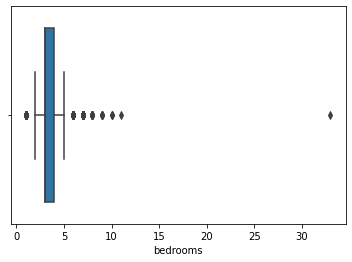

In [10]:
#checking outliers in bedroom column
sns.boxplot(x='bedrooms',data=df);

DATA PROCESSING

To start with  we will drop columns that will not be usefull in our project.we will iignore some of thhe following features from our data set:
date
view
yr_renovated
zipcode
lat
long


In [11]:
df = df.drop(columns = [ 'id', 'view',  'zipcode', 'lat', 'long'])



In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
dtypes: float64(5), int64(9), object(2)
memory usage: 2.6+ MB


Cleaning functions.

This functions will be used  to clean our data

In [13]:
#Cheicking missing value
def look_nulls(df):
    missing_list =[]
    for column in df.columns:
        if df[column].isna().sum() > 0:
            missing_list.append(column)
    return missing_list

In [14]:
#number of missing values in dataset
def show_no_sum(df,column):
    return df[column].isna().sum()

In [15]:
# filling missing values with values
def fill_na(df,column,value):
    df[column]= df[column].fillna(value)

Looking fo NAN values and missing values

In [16]:
# looking of  nulls values  in dataset
look_nulls(df)

['waterfront', 'yr_renovated']

In [17]:
# number of missing values in the waterfront column
show_no_sum(df,['waterfront'])

waterfront    2376
dtype: int64

In [18]:
# Replace the Non  NAN value with 0
fill_na(df,['waterfront'],0)


In [19]:
# Replace the Non  NAN value with 0
fill_na(df,['yr_renovated'],0)


In [20]:
# Recheck if there is any missing column
look_nulls(df)

[]

In [21]:
df['sqft_basement'].value_counts()
# Missing data represented by '?' - 454 observations missing data


0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
3000.0        1
1275.0        1
2180.0        1
784.0         1
666.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [22]:
#look at the  percentage account to the values
df.sqft_basement.value_counts(normalize = True)




0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
3000.0    0.000046
1275.0    0.000046
2180.0    0.000046
784.0     0.000046
666.0     0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [23]:
df['sqft_basement'].replace('?', 0.0, inplace = True) # replace the ? with 0 bbecause  it account 60%
df['sqft_basement'] = df['sqft_basement'].astype(float).astype(int) # convert into integer

In [24]:
# Summary statistics
df.describe()



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


the avarage  price  of house 5.4 million dollars.

The maximmum price of  house 7.7 million dollars.

we can see outlier in bedrooms column is 33 bedrooms




Exploratory Data Analysis

UNIVARIATE ANALYSIS

Look   distribution of Price through Histogram


In [25]:
# First create a function  for plotting histogram
def create_hist(feature, num_bins, title, x_label, y_label, color='blue',plot_size = (10,6)):
    plt.figure(figsize=plot_size)
    feature.hist(bins = num_bins, color=color, grid = False)
    plt.title(title, fontdict = {'fontsize': 14})
    plt.xlabel(x_label, fontdict = {'fontsize':13})
    plt.ylabel(y_label, fontdict = {'fontsize':13})
    plt.tight_layout;

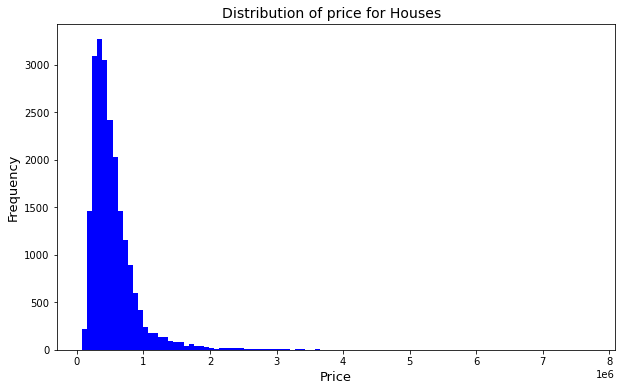

In [26]:
create_hist(df['price'], 
            num_bins = 100, 
            title = 'Distribution of price for Houses  ',
           x_label = 'Price',
           y_label = 'Frequency')

We can see above the distribution target is normaly distributed..it is right skewed . I will use log transformation to make the target well distributed in my linear regression model.

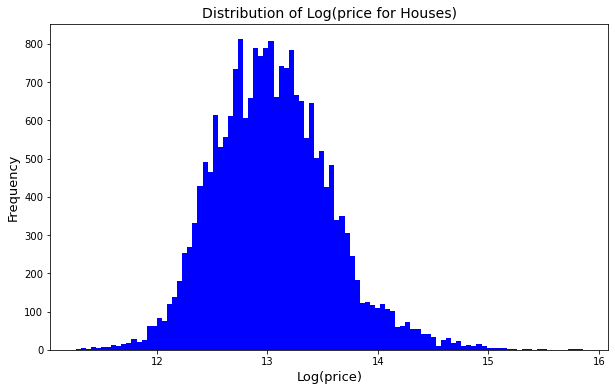

In [27]:
# Using log transformation to make it normalized data
create_hist(np.log(df['price']), 
            num_bins = 100, 
            title = 'Distribution of Log(price for Houses)',
           x_label = 'Log(price)',
           y_label = 'Frequency')

logging the data helps in making the data normaly distributed.

Categorical Data

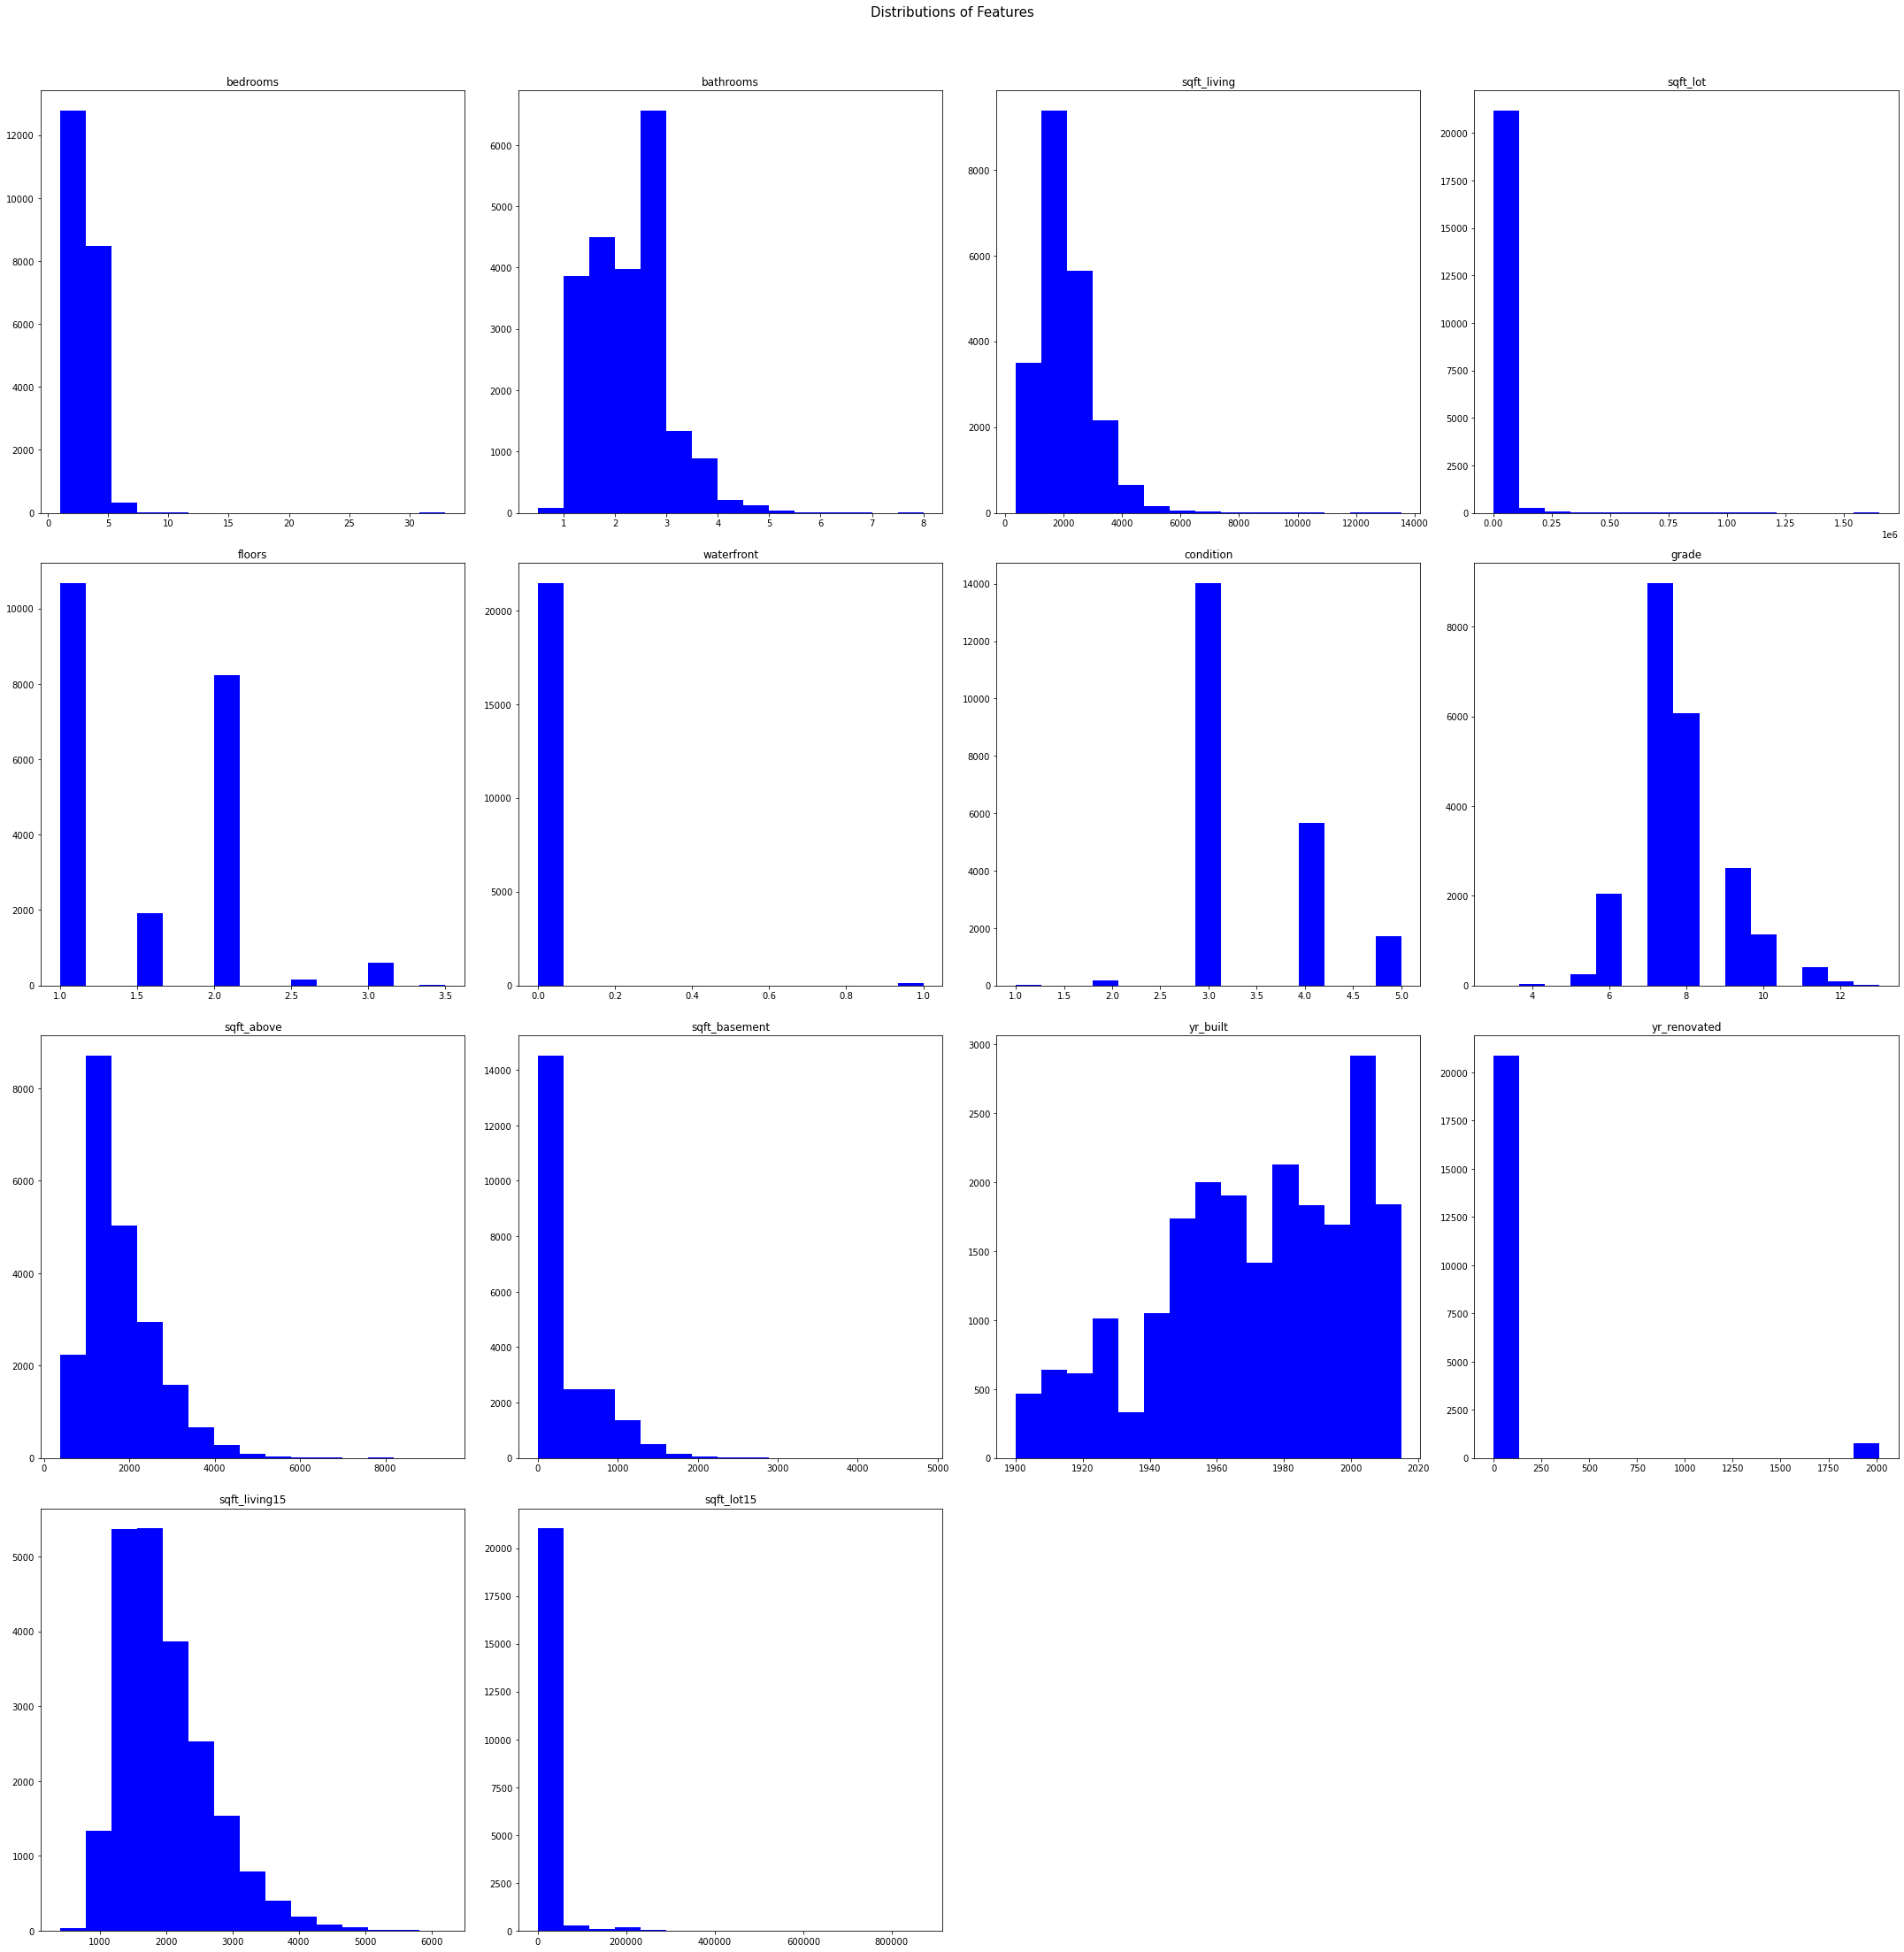

In [28]:
df.drop(columns='price').hist(figsize=(30, 30), bins = 15, grid = False, color = 'blue')
plt.suptitle('Distributions of Features', x = 0.5, y = 1.02, size = 15)
plt.tight_layout()

I have  visualized feauture which will  be used in my anlyisis.As we can see from the above  cells majority of the categorical features are not normally distributed. 

BIVARIATE ANALYSIS

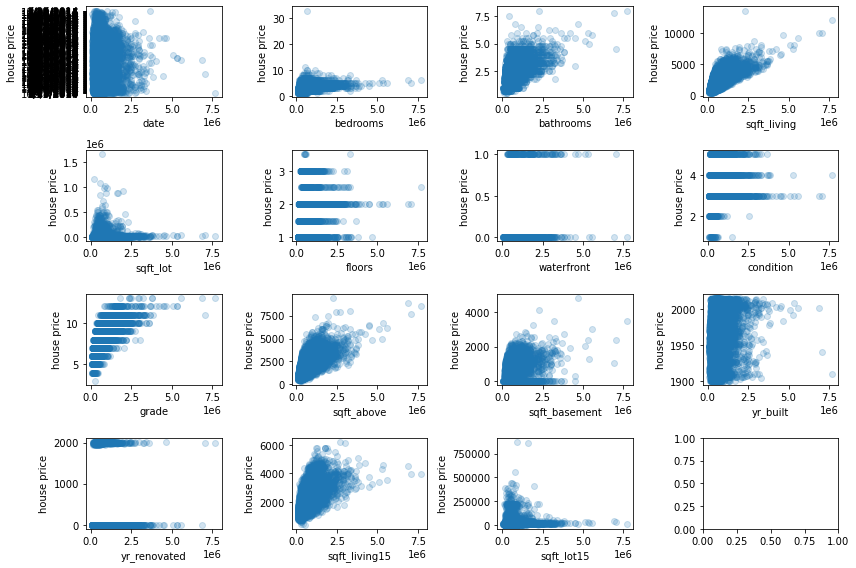

In [29]:
#look at the correlation between the categorical features  and the target (price of house)
scatterplot_data = df.drop("price", axis=1)

fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//4][index%4]
    ax.scatter(df['price'], df[col], alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("house price")

we can see linear relationship between the categorical data with target feature(house price)

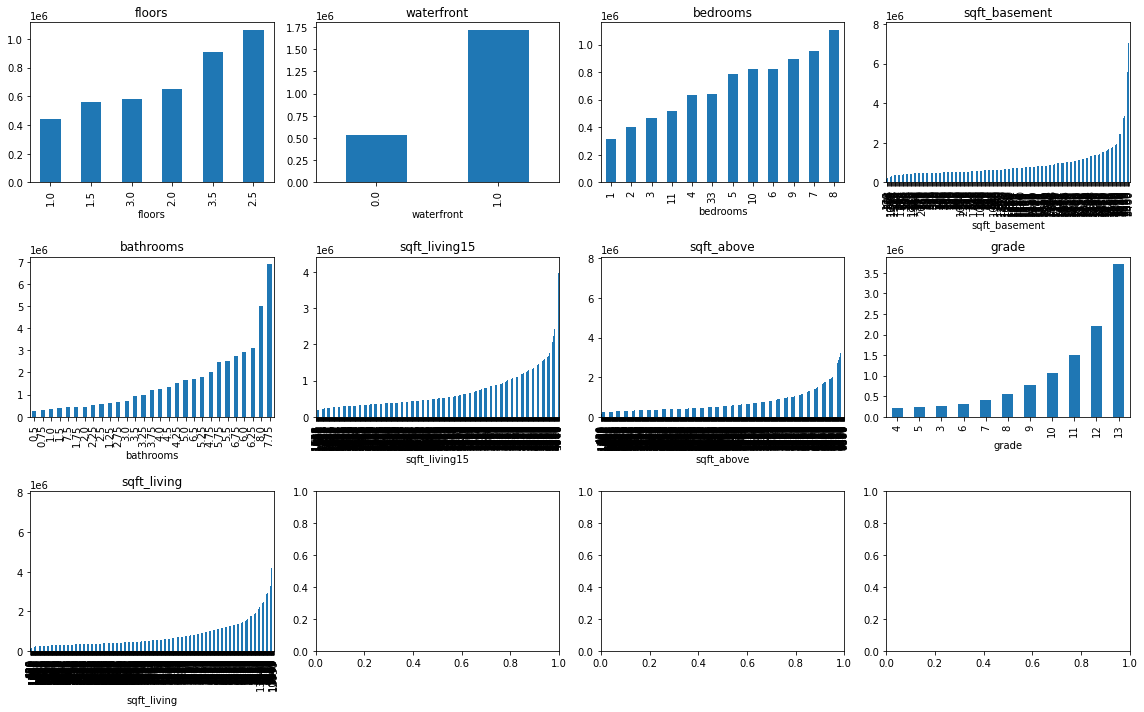

In [30]:

fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (16,10))

categoricals = ['floors','waterfront','bedrooms','sqft_basement','bathrooms','sqft_living15','sqft_above','grade','sqft_living']

for col, ax in zip(categoricals, axes.flatten()):
    (df.groupby(col)              # group values together by column of interest
        .mean()['price']            # take the mean of the saleprice for each group
        .sort_values()              # sort the groups in ascending order
        .plot
        .bar(ax = ax))                # create a bar graph on the ax
    
    ax.set_title(col)               # Make the title the name of the column
    
fig.tight_layout()

we have plot prices of the house against the categorical data.

In [31]:
df['date']=pd.to_datetime(df['date'])
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [32]:

#Create two new columns for year and the months
df['year']= df['date'].apply(lambda x : x.year)
df['month']= df['date'].apply(lambda x : x.month)


<AxesSubplot:xlabel='month'>

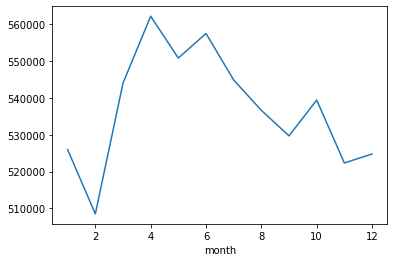

In [33]:
#plot graph of avarage price of house over the month
df.groupby('month').mean()['price'].plot()

From the line graph above we can see that the highest avarage price of the 560000 dollar which was sold on April while the lowest
is 510000 dollars wchich sold on february.From the graph abbbove we cans see the price  are fluctuating rising and falling over period of time.

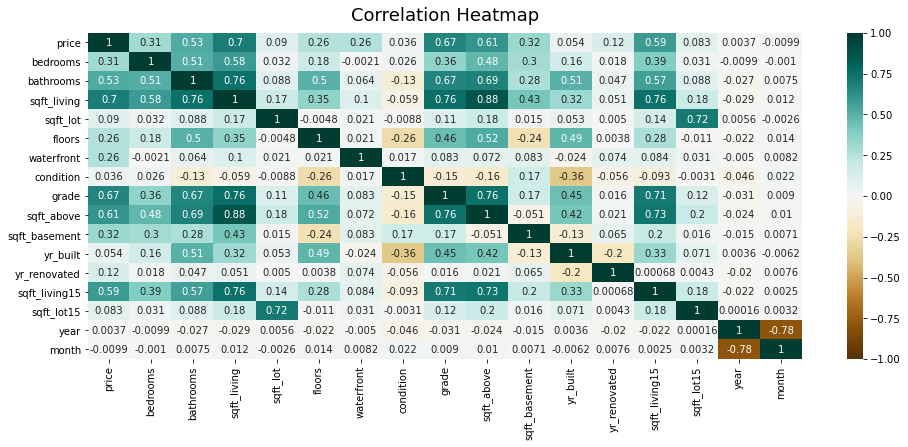

In [34]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

From the heat mape we can see colinearity of variable agaisnt each other.


In [35]:
# show the relationship between categorical features with the target 
corr_matrix = df.corr()[[ 'price']].sort_values('price')
corr_matrix


,price
month,-0.009928
year,0.003727
condition,0.036056
yr_built,0.053953
sqft_lot15,0.082845
sqft_lot,0.089876
yr_renovated,0.117855
floors,0.256804
waterfront,0.264306
bedrooms,0.308787


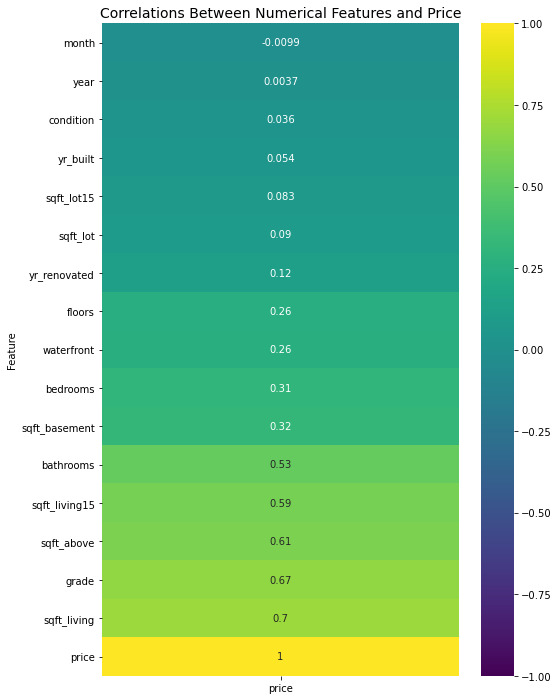

In [36]:
#Heat map to show correlation of numerical features with price
plt.figure(figsize=(8, 12))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = 'viridis')
plt.title('Correlations Between Numerical Features and Price', fontdict={'fontsize':14})
plt.ylabel('Feature');

We have created a heatmap to show the realtionship between the target price and the categorical data.
From the plot above we can see that square fit living has the hihgest correllation  and the lowest correlation iis condition .

In [37]:
#Take only features that have correlation coefficient of o.25
corr_target = abs(corr_matrix)
target_num_features = corr_target.loc[corr_target['price'] >= 0.25, :]
target_num_features

,price
floors,0.256804
waterfront,0.264306
bedrooms,0.308787
sqft_basement,0.321108
bathrooms,0.525906
sqft_living15,0.585241
sqft_above,0.605368
grade,0.667951
sqft_living,0.701917
price,1.000000


I have picked categorical feature above o.25 which I will be able to usee in order to build my model